# Detección de Ansiedad y Depresión en Textos de Estudiantes


***Descripción del problema***

Actualmente hay una creciente tendencia a detectar de manera temprana problemas de salud mental en los usuarios de las redes sociales, éstas han tenido un impacto negativo en la salud mental de adolescentes y adultos jóvenes.

cada vez son más los esfuerzos que hacen las compañías detrás de las redes sociales para actuar de manera preventiva e incluso brindando apoyo. Es por ello, que el caso de uso que se abarca en este documento va en relación con esta problemática. Lo que se busca con este caso de uso en particular es lograr la detección de comportamientos o tendencias a la depresión en términos de salud mental, por medio del análisis del contenido de comentarios en redes sociales. Luego con esta información sería posible realizar proyectos preventivos o incluso brindar ayuda.

Para lograr llevar a cabo este caso de uso, se hará uso del siguiente dataset:

https://www.kaggle.com/datasets/nidhiy07/student-depression-text

En el presente trabajo se predente analizar textos obtenidos de redes sociales , comentarios , etc. Donde tenemos dos tipos o clases de textos: Normales(0) o Ansiedad/Depresion(1). Todas las personas seleccionadas para la anotación de datos hablan muy bien el idioma inglés y son estudiantes con un rango de edad: 15 a 17 En nuestro dataset Hay 5 columnas en este conjunto de datos: Texto, etiquetas, edad, categoría de edad y género. y la columna de etiqueta indica si el texto correspondiente denota ansiedad o depresión.

Objetivos específicos:

Implementar los modelos de aprendizaje de máquina: árboles de decisión,random forest, redes neunales y redes neuronales profundas.
Realizar análisis y pruebas con el dataset suministrado de Kaggle.
Aplicar ténicas de procesamiento al conjunto de datos.

(Tomado del trabajo presentado por el grupo de Orlando Padilla IA2024-I)

***Variables del conjunto de datos***
1. Texto (Columna “text”)
   * Esta columna contiene los mensajes de texto recopilados de estudiantes.
   * Los mensajes pueden ser normales o relacionados con ansiedad o depresión.
2. Etiqueta (Columna “label”)
   * Indica si el texto correspondiente denota ansiedad o depresión.
   * Toma el valor de 1 para indicar ansiedad o depresión y el valor de 0 si no.
3. Edad (Columna “Age”)
   * Los datos provienen de estudiantes cuyas edades están en el rango de 13 a 17 años.
4. Categoría de Edad (Columna “Age Category”)
   * Indica a que categoría pertenecen los estudiantes según su edad.
5. Género (Columna “Gender”)
   * Especifica el género de los estudiantes.

   (Tomado del trabajo presentado por el grupo de Guillermo Parra IA2024-I)

### Librerias requeridas

In [1]:
# standard
import pandas as pd
import numpy as np
#from pandas.plotting import scatter_matrix
import re

# plots
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# string functions
#import string

# NLTK
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer

### Lectura e inspección del Dataset

In [2]:
df = pd.read_excel('./depression_text.xlsx')
df.head(10)

,text,label,Age,Gender,Age Category
0,let Gather For Party,0.0,16.0,Male,Teen Age
1,I hate being alive when I feel so dead inside.,1.0,17.0,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Dep...,1.0,16.0,Male,Teen Age
3,Nice picture,0.0,16.0,Male,Teen Age
4,"Feeling worried, even though you actually have...",1.0,16.0,Male,Teen Age
5,"There are people who died, their friends didn'...",0.0,16.0,Male,Teen Age
6,keep it up hahaha,0.0,16.0,Male,Teen Age
7,The match cycle I had.Buy-brought-out-lost.,0.0,16.0,Male,Teen Age
8,"nctb! jewel case dream, which doesn't have a p...",0.0,16.0,Male,Teen Age
9,"college but it's like not going to college, bu...",0.0,16.0,Male,Teen Age


Impresión de las 10 primeras filas del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7489 entries, 0 to 7488
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          7476 non-null   object 
 1   label         7486 non-null   float64
 2   Age           7486 non-null   float64
 3   Gender        7486 non-null   object 
 4   Age Category  7486 non-null   object 
dtypes: float64(2), object(3)
memory usage: 292.7+ KB


El conjunto de datos tiene 7488 ejemplos, 4 variables predictoras, y la variable a predecir que es la variable label. Dos de las variables son de tipo numéricas: label y age; mientras que las demás son de tipo object, son cadenas de string.


##### **Resumen estadístico**

In [4]:
df.describe()

,label,Age
count,7486.000000,7486.000000
mean,0.163906,15.379108
std,0.370215,1.058104
min,0.000000,13.000000
25%,0.000000,14.000000
50%,0.000000,15.000000
75%,0.000000,16.000000
max,1.000000,17.000000


Se muestra un resumen estadístico de las variables numéricas

##### ** Revisión de valores nulos**

In [5]:
df.isna().sum().to_frame()

,0
text,13
label,3
Age,3
Gender,3
Age Category,3


Algunas filas del dataset contienen valores nulos, entre ellos hay 13 ejemplos que no tienen texto en la variable text

In [6]:
# Eliminación de filas que contienen datos nulos
df.dropna(axis=0, inplace=True)
df.isna().sum().to_frame()

,0
text,0
label,0
Age,0
Gender,0
Age Category,0


### Exploración visual de los datos

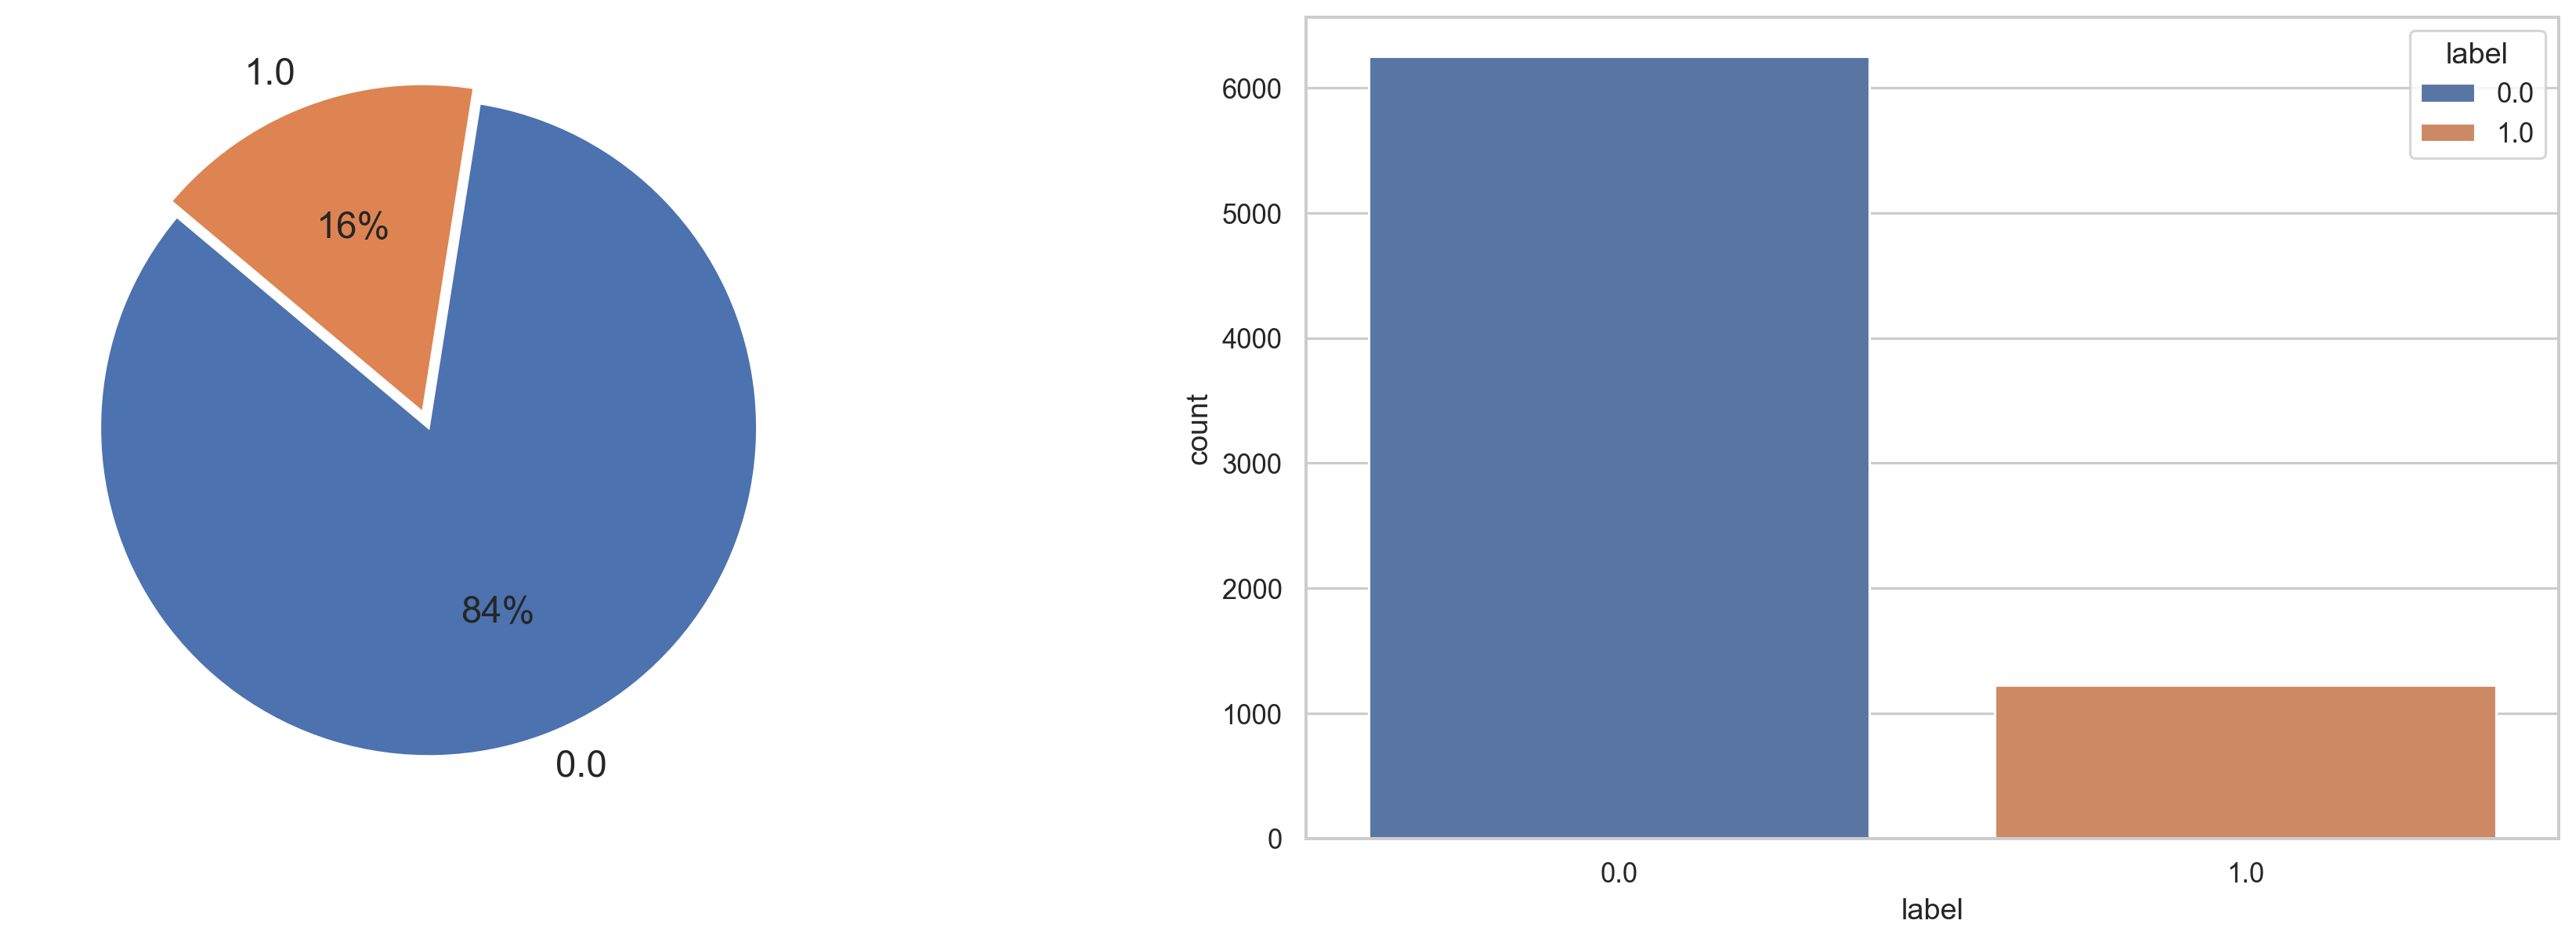

In [7]:
labels = df['label'].unique()
dist = (df['label'].value_counts()).to_numpy()

sns.set(style="whitegrid")

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(dist, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.countplot(df, x="label", hue='label')
#sns.barplot(x = df['label'].unique(), y = df['label'].value_counts())

plt.show()

El conjunto de datos está desbalanceado. Hay más ejemplos en la clase 0, que en la clase 1

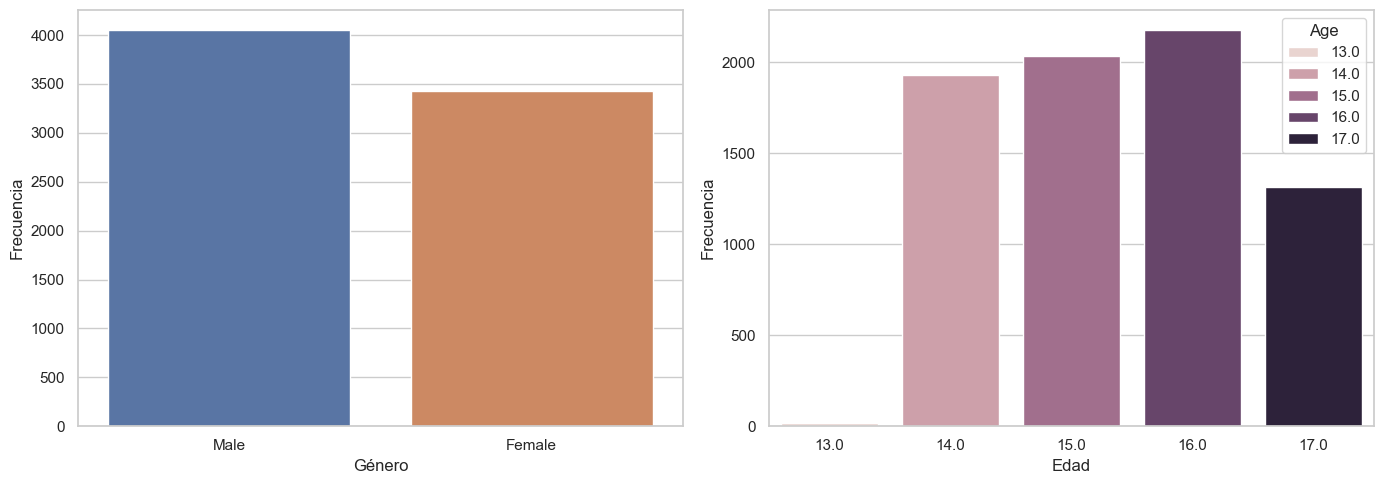

In [8]:
sns.set(style="whitegrid")
# Crear un subplot de 1x2
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribución de la columna 'Gender'
sns.countplot(ax=axes[0], x='Gender', data=df, hue='Gender')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Frecuencia')

# Distribución de la columna 'Age'
sns.countplot(ax=axes[1], x='Age', data=df, hue='Age')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Text Processing

El procesamiento de texto es una parte importante para poder utilizar datos tipo texto como datos de entrenamiento. Con las siguientes instrucciones de código se van a limpiar y vectorizar los datos para facilitar su analisis. En este ejemplo se llevaran a cabo los siguientes pasos:

* Conversion de todo el texto minusculas
* Eliminacion de signos de puntuacionión 
* Eliminacion de StopWords
* Lematizacion
* Vectorizacion
* Tambien se cambiaran contracciones por no contracciones utilizando un especifico diccionario de contracciones

In [9]:
from unidecode import unidecode
from nltk import pos_tag

nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Definir stopwords
stop_words = set(stopwords.words('english'))

contractions_dict = {
        "ain't": "am not", "aren't": "are not","can't": "cannot","couldn't": "could not","didn't": "did not","doesn't": "does not","don't": "do not",
        "dont": "do not","hadn't": "had not","hasn't": "has not","haven't": "have not", "he's": "he is","he'll": "he will","he'd": "he would",
        "i've": "i have","i'm": "i am","im": "i am","isn't": "is not","it's": "it is", "it'll": "it will","i'll": "i will","i'd": "i would",
        "let's": "let us","mightn't": "might not","mustn't": "must not","shan't": "shall not","she's": "she is","she'll": "she will","she'd": "she would",
        "shouldn't": "should not","that's": "that is", "there's": "there is", "they're": "they are", "they'll": "they will","they'd": "they would",
        "we're": "we are","we'll": "we will","we'd": "we would","weren't": "were not","what's": "what is","where's": "where is","who's": "who is",
        "who'll": "who will","won't": "will not","wouldn't": "would not","you're": "you are","you'll": "you will","you'd": "you would","y'all": "you all",
        "y'know": "you know","you've": "you have"
}

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Unimagdalena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Unimagdalena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Unimagdalena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Unimagdalena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
def clean_text(text):
    text = text.lower() #conversión a minúsculas
    for contraction, expansion in contractions_dict.items(): #Eliminación de contracciones
        text = re.sub(contraction, expansion, text, flags=re.IGNORECASE) #Sustituye contraction en el string text por expansion
    text = re.sub(r'[^a-z\s]', '', text) #Eliminación de simbolos
    text = re.sub(r'\s+', ' ', text).strip()
    words = word_tokenize(text) #Tokenizar es extraer todos las palabras que se encuentren en texto
    stop_words = set(stopwords.words('english')) #Eliminación de stopwords
    words = [word for word in words if word not in stop_words]
    lemmatizer = WordNetLemmatizer() #Lematizacion
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)


In [11]:
df['cleaned_text'] = df['text'].apply(clean_text)
print(df.head())

                                                text  label   Age  Gender  \
0                               let Gather For Party    0.0  16.0    Male   
1    I hate being alive when I feel so dead inside.     1.0  17.0  Female   
2  Exam are Comimg I  m already  Feeling Very Dep...    1.0  16.0    Male   
3                                       Nice picture    0.0  16.0    Male   
4  Feeling worried, even though you actually have...    1.0  16.0    Male   

  Age Category                                       cleaned_text  
0     Teen Age                                   let gather party  
1     Teen Age                        hate alive feel dead inside  
2     Teen Age            exam comi amg already feeling depressed  
3     Teen Age                                       nice picture  
4     Teen Age  feeling worried even though actually god ready...  


<Figure size 640x480 with 0 Axes>

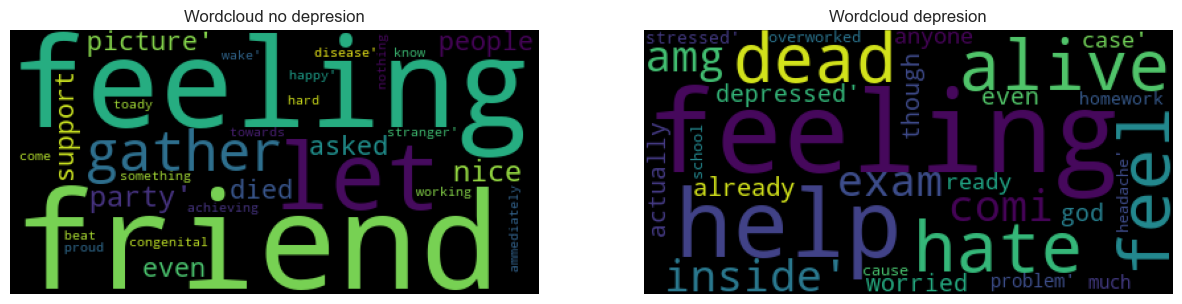

In [12]:
text_1 = df[df['label'] == 1.0]['cleaned_text'].values
text_0 = df[df['label'] == 0.0]['cleaned_text'].values

wordcloud1 = WordCloud().generate(str(text_0))
wordcloud2 = WordCloud().generate(str(text_1))

plt.figure()
f, axarr = plt.subplots(1,2)

axarr[0].imshow(wordcloud1)
axarr[1].imshow(wordcloud2)
axarr[0].axis('off')
axarr[1].axis('off')
axarr[0].set_title('Wordcloud no depresion')
axarr[1].set_title('Wordcloud depresion')
fig = plt.gcf()
fig.set_size_inches(15, 15)
plt.show()

### Vectorizacion de las palabras extraidas

### Count vectorizer

Crea una matriz de terminos que contiene el número de veces que cada termino del corpus aparece en cada documento.

Ejemplo:

texto1 = ‘Hello my name is james'  
texto2 = 'this is my python notebook’

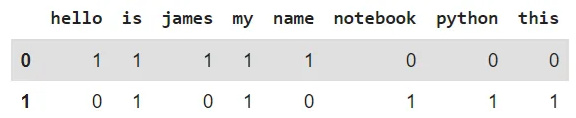

(Ejemplo tomado de: https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer1 = CountVectorizer(min_df=0.005)
vectorized_text1 = vectorizer1.fit_transform(df['cleaned_text'])

In [14]:
print(vectorized_text1.shape)

(7476, 214)


### Frequency–inverse document frequency (TF-IDF): 
Mide la relevancia de una palabra w para un documento Doc dentro de una colección o corpus.

"C:\Users\Unimagdalena\Desktop\IA2024II\ML\ejemplos\tfidf.pptx"


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(min_df=0.005)
vectorized_text2 = vectorizer2.fit_transform(df['cleaned_text'])

In [16]:
print(vectorized_text2.shape)

(7476, 214)


In [17]:
#Convertir texto en características numéricas
df_temp = df.drop(['text', 'cleaned_text'], axis=1)
df_text = pd.DataFrame(data=vectorized_text2.toarray(), columns = vectorizer2.get_feature_names_out())

df_temp.reset_index(drop=True, inplace=True)
df_text.reset_index(drop=True, inplace=True)

df_new = pd.concat([df_temp, df_text], axis=1)
df_new.head()

,label,Age,Gender,Age Category,able,account,actually,afraid,album,allah,...,worried,worry,would,wow,wrong,ya,year,yes,yesterday,yet
0,0.0,16.0,Male,Teen Age,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,17.0,Female,Teen Age,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,16.0,Male,Teen Age,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,16.0,Male,Teen Age,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,16.0,Male,Teen Age,0.0,0.0,0.416851,0.0,0.0,0.0,...,0.349783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
df_text1 = pd.DataFrame(data=vectorized_text1.toarray(), columns = vectorizer1.get_feature_names_out())

#df_temp.reset_index(drop=True, inplace=True)
df_text1.reset_index(drop=True, inplace=True)

df_new1 = pd.concat([df_temp, df_text1], axis=1)
df_new1.head()

,label,Age,Gender,Age Category,able,account,actually,afraid,album,allah,...,worried,worry,would,wow,wrong,ya,year,yes,yesterday,yet
0,0.0,16.0,Male,Teen Age,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,17.0,Female,Teen Age,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,16.0,Male,Teen Age,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,16.0,Male,Teen Age,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,16.0,Male,Teen Age,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
